<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Pandas Tutorial -->  
	  <center>
	    <br>
        <h1>Part 2</h1>
        <br>
        <br>
	  </center>	
    <!-- Pandas Tutorial -->	
  </div>
<!-- ---------------------------------------------------- -->

**Get Data** - Our data set will consist of an Excel file containing customer counts per date. We will learn how to read in the excel file for processing.  
**Prepare Data** - The data is an irregular time series having duplicate dates. We will be challenged in compressing the data and coming up with next years forecasted customer count.  
**Analyze Data** - We use graphs to visualize trends and spot outliers. Some built in computational tools will be used to calculate next years forecasted customer count.  
**Present Data** - The results will be plotted.  

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import sys
import matplotlib

%matplotlib inline

> We will be creating our own test data for analysis.

In [ ]:
# set seed
np.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2014', end='11/20/2017', freq='W-MON')
        #print len(rng)
        # Create random data
        data = np.randint(low=25,high=1000,size=len(rng))
        
        # Status pool 
        status = ["Apoxin","Symcodin","Lipsorol"]
        
        # Make a random list of statuses
        random_status = [status[np.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        countries = ['BEL','deu','DEU','Aus','Ecu','jpn','NGA','PHL','ECU', 'BRA','JPN']
        
        # Make a random list of states 
        random_countries = [countries[np.randint(low=0,high=len(countries))] for i in range(len(rng))]
    
        Output.extend(zip(random_countries, random_status, data, rng))
        
    return Output

Now that we have a function to generate our test data, lets create some data and stick it into a dataframe.

In [ ]:
dataset = CreateDataSet(10)
df = pd.DataFrame(data=dataset, columns=['Countries','Product','CustomerCount','StatusDate'])
df.info()

In [ ]:
df.describe()

In [ ]:
df.head() #GETTING First 5 rows

We are now going to save this dataframe into an Excel file, to then bring it back to a dataframe. We simply do this to show you how to read and write to Excel files.  

We do not write the index values of the dataframe to the Excel file, since they are not meant to be part of our initial test data set.

In [ ]:
# Save results to excel
df.to_excel('World-Wide-Sales.xlsx', index=False)
print('Done')

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

# Grab Data from Excel  

We will be using the ***read_excel*** function to read in data from an Excel file. The function allows you to read in specfic tabs by name or location.

In [ ]:
pd.read_excel?

**Note: The location on the Excel file will be in the same folder as the notebook, unless specified otherwise.**

In [2]:
# Location of file
Location = r'World-Wide-Sales.xlsx'
# Parse a specific sheet
df = pd.read_excel(Location, 0, index_col='StatusDate')
df.dtypes

Countries        object
Product          object
CustomerCount     int64
dtype: object

In [3]:
df

,Countries,Product,CustomerCount
StatusDate,,,
2014-01-06,DEU,Symcodin,877
2014-01-13,NGA,Lipsorol,901
2014-01-20,Aus,Apoxin,749
2014-01-27,BEL,Apoxin,111
2014-02-03,DEU,Apoxin,300
2014-02-10,BEL,Lipsorol,706
2014-02-17,PHL,Lipsorol,347
2014-02-24,deu,Apoxin,143
2014-03-03,BEL,Symcodin,833


In [ ]:
df.index

In [ ]:
df.head()

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

# Prepare Data  

We first need to prepare the data for analysis
1. Make sure the countries column is all in upper case  
2. Only select records where the account status is equal to "1"  
3. Merge (NJ and NY) to NY in the state column  
4. Remove any outliers (any odd results in the data set)


Lets take a quick look on how some of the *State* values are upper case and some are lower case

In [ ]:
df['Countries'].unique()

To convert all the State values to upper case we will use the ***upper()*** function and the dataframe's ***apply*** attribute. The ***lambda*** function simply will apply the upper function to each value in the *State* column.

In [ ]:
# Clean Countries Column, convert to upper case
df['Countries'] = df.Countries.apply(lambda x: x.upper())

In [ ]:
df['Countries'].unique()

In [ ]:
# Only grab where Product == 1 
mask = df['Product'] == "Apoxin"
df_1 = df[mask]

In [ ]:
df_1

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

# Lets Group European Countries to EU --> Single Market

To turn the ***DEU***, ***BEL*** states to ***EU*** we simply...  

* ***[df.Countries == 'DEU']*** & ***[df.Countries == 'BEL']*** - Find all records in the *Countries* column where they are equal to *EU*.  
* ***df.Countries[df.Countries == 'DEU'] = 'EU'*** 
* ***df.Countries[df.Countries == 'BEL'] = 'EU'*** - For all records in the *Coutries* column where they are equal to *DEU* & *BEL*, replace them with *EU*.

In [ ]:
# Convert DEU TO EU
mask = df.Countries == 'DEU' ##grabbing all the position where `Countries` == 'DEU' 
df['Countries'][mask]

In [ ]:
df.loc[mask,'Countries'] =u'EU'

Do this for ***BEL*** too ! 

In [ ]:
# Convert DEU TO EU
mask = df.Countries == 'BEL' ##grabbing all the position where `Countries` == 'DEU' 
df.loc[mask,'Countries'] = u'EU'

In [ ]:
df

In [ ]:
df['Countries'].unique()

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

Now we have organised our data cleanly and according to our need.

At this point we may want to graph the data to check for any outliers or inconsistencies in the data. We will be using the ***plot()*** attribute of the dataframe.  

As you can see from the graph below it is not very conclusive and is probably a sign that we need to perform some more data preparation.

In [ ]:
df['CustomerCount'].plot(figsize=(15,5));

If we take a look at the data, we begin to realize that there are multiple values for the same Country, StatusDate, and Product combination. It is possible that this means the data you are working with is dirty/bad/inaccurate, but we will assume otherwise. We can assume this data set is a subset of a bigger data set and if we simply add the values in the ***CustomerCount*** column per Country, StatusDate, and Product we will get the ***Total Customer Count*** per day.  

In [ ]:
sortdf = df[df['Countries']=='EU'].sort_index(axis=0)
sortdf.head(10)

<hr style="height:3px;border:none;color:#333;background-color:#333;" />
<hr style="height:3px;border:none;color:#333;background-color:#333;" />

## We want to learn about sales performance in time

Our task is now to create a new dataframe that compresses the data so we have daily customer counts per Country and StatusDate.
To accomplish this we will use the dataframe's functions ***groupby*** and ***sum()***.

### First :
we have to use **reset_index** . If we did not, we would not have been able to group by both the Countries and the StatusDate since the groupby function expects only columns as inputs. The **reset_index** function will bring the index ***StatusDate*** back to a column in the dataframe. 

In [ ]:
# Reset Index
df_reset = df.reset_index()


In [ ]:
df_reset

In [ ]:
df_reset[df_reset['Countries']=='AUS'].sort_values(by=['StatusDate'])

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

## Lets also focus on one Product 
We want to check how is our *new drug* **Lipsorol** performing. 
* Take only ***Product == 'Lipsorol'***

In [ ]:
lipsorol_data = df_reset[df_reset['Product']=="Lipsorol"]
lipsorol_data.head()

In [ ]:
#Lets Now delete Product Column from this DataFrame as we only have 1 Product
del lipsorol_data['Product']
lipsorol_data.head()

In [ ]:
lipsorol_data

### We group the data now
The ***Countries*** and ***StatusDate*** columns are automatically placed in the index of the ***Daily*** dataframe. You can think of the ***index*** as the primary key of a database table but without the constraint of having unique values. Columns in the index as you will see allow us to easily select, plot, and perform calculations on the data.  

In [ ]:
# Group by State and StatusDate
Daily = lipsorol_data.groupby(['Countries','StatusDate']).sum()

Daily.head()

In [ ]:
Daily

In [ ]:
# What is the index of the dataframe
Daily.index

In [ ]:
# Select the State index
Daily.index.levels[0]

In [ ]:
# Select the StatusDate index
Daily.index.levels[1]

<hr style="height:3px;border:none;color:#333;background-color:#333;" />

Lets now plot the data per Country.  

As you can see by breaking the graph up by the ***Coutries*** column we have a much clearer picture on how the data looks like. Can you spot any outliers?

In [ ]:
Daily.index.levels[0]

In [ ]:
Daily.loc['AUS'].plot(title='AUS')
Daily.loc['BRA'].plot(title='BRA')
Daily.loc['ECU'].plot(title='ECU')
Daily.loc['EU'].plot(title='EU')
Daily.loc['JPN'].plot(title='JPN')
Daily.loc['NGA'].plot(title='NGA')
Daily.loc['PHL'].plot(title='PHL')

We can also just plot the data on a period of time or specific date, like ***2017:01 to 2017:05*** or ***2016***. We can now clearly see that the data for these Countries is all over the place. since the data consist of weekly customer counts, the variability of the data seems suspect. For this tutorial we will assume bad data and proceed. 

In [ ]:
Daily.loc['AUS']['2017-01':'2017-05']

In [ ]:
Daily.loc['AUS']['2016':'2016']

In [ ]:
Daily.loc['AUS']['2017-01':'2017-05'].plot(title='AUS',marker='*')
Daily.loc['BRA']['2017-01':'2017-05'].plot(title='BRA',marker='*')
Daily.loc['ECU']['2017-01':'2017-05'].plot(title='ECU',marker='*')
Daily.loc['EU']['2017-01':'2017-05'].plot(title='EU',marker='*')
Daily.loc['JPN']['2017-01':'2017-05'].plot(title='JPN',marker='*')
Daily.loc['NGA']['2017-01':'2017-05'].plot(title='NGA',marker='*')
Daily.loc['PHL']['2017-01':'2017-05'].plot(title='PHL',marker='*')

In [ ]:
Daily.loc['AUS']['2016':'2016'].plot(title='AUS',marker='*')
Daily.loc['BRA']['2016':'2016'].plot(title='BRA',marker='*')
Daily.loc['ECU']['2016':'2016'].plot(title='ECU',marker='*')
Daily.loc['EU']['2016':'2016'].plot(title='EU',marker='*')
Daily.loc['JPN']['2016':'2016'].plot(title='JPN',marker='*')
Daily.loc['NGA']['2016':'2016'].plot(title='NGA',marker='*')
Daily.loc['PHL']['2016':'2016'].plot(title='PHL',marker='*')

We will assume that per month the customer count should remain relatively steady. Any data outside a specific range in that month will be removed from the data set. The final result should have smooth graphs with no spikes.  

***CountryYearMonth*** - Here we group by Countries, Year of StatusDate, and Month of StatusDate.  
***Daily['Outlier']*** - A boolean (True or False) value letting us know if the value in the CustomerCount column is ouside the acceptable range.  

We will be using the attribute ***transform*** instead of ***apply***. The reason is that transform will keep the shape(# of rows and columns) of the dataframe the same and apply will not. By looking at the previous graphs, we can realize they are not resembling a gaussian distribution, this means we cannot use summary statistics like the mean and stDev. We use percentiles instead. Note that we run the risk of eliminating good data.

In [ ]:
# Calculate Outliers
CountryYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Upper'] = StateYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper']) 

# Remove Outliers
Daily = Daily[Daily['Outlier'] == False]

In [ ]:
StateYearMonth.sum()

In [ ]:
Daily.index.levels[0]

In [ ]:
Daily.index.get_level_values(1)

In [ ]:
[Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month]

The dataframe named ***Daily*** will hold customer counts that have been aggregated per day. The original data (df) has multiple records per day.  We are left with a data set that is indexed by both the state and the StatusDate. The Outlier column should be equal to ***False*** signifying that the record is not an outlier.

In [ ]:
Daily

In [ ]:
Daily.head()

We create a separate dataframe named ***ALL*** which groups the Daily dataframe by StatusDate. We are essentially getting rid of the ***State*** column. The ***Max*** column represents the maximum customer count per month. The ***Max*** column is used to smooth out the graph.

In [ ]:
# Combine all markets

# Get the max customer count by Date
ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount'] # rename column

# Group by Year and Month
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

# What is the max customer count per Year and Month
ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

As you can see from the ***ALL*** dataframe above, in the month of January 2009, the maximum customer count was 901. If we had used ***apply***, we would have got a dataframe with (Year and Month) as the index and just the *Max* column with the value of 901. 

----------------------------------  
There is also an interest to gauge if the current customer counts were reaching certain goals the company had established. The task here is to visually show if the current customer counts are meeting the goals listed below. We will call the goals ***BHAG*** (Big Hairy Annual Goal).  

* 12/31/2011 - 1,000 customers  
* 12/31/2012 - 2,000 customers  
* 12/31/2013 - 3,000 customers  

We will be using the **date_range** function to create our dates.  

***Definition:*** date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None)  
***Docstring:*** Return a fixed frequency datetime index, with day (calendar) as the default frequency  

By choosing the frequency to be ***A*** or annual we will be able to get the three target dates from above.

In [ ]:
pd.date_range?

In [ ]:
# Create the BHAG dataframe
data = [1000,2000,3000]
idx = pd.date_range(start='12/31/2011', end='12/31/2013', freq='A')
BHAG = pd.DataFrame(data, index=idx, columns=['BHAG'])
BHAG

Combining dataframes as we have learned in previous lesson is made simple using the ***concat*** function. Remember when we choose ***axis = 0*** we are appending row wise.

In [ ]:
# Combine the BHAG and the ALL data set 
combined = pd.concat([ALL,BHAG], axis=0)
combined = combined.sort_index(axis=0)
combined.tail()

In [ ]:
fig, axes = plt.subplots(figsize=(12, 7))

combined['BHAG'].fillna(method='pad').plot(color='green', label='BHAG')
combined['Max'].plot(color='blue', label='All Markets')
plt.legend(loc='best');

There was also a need to forecast next year's customer count and we can do this in a couple of simple steps. We will first group the ***combined*** dataframe by ***Year*** and place the maximum customer count for that year. This will give us one row per Year.   

In [ ]:
# Group by Year and then get the max value per year
Year = combined.groupby(lambda x: x.year).max()
Year

In [ ]:
# Add a column representing the percent change per year
Year['YR_PCT_Change'] = Year['Max'].pct_change(periods=1)
Year

To get next year's end customer count we will assume our current growth rate remains constant. We then will increase this years customer count by that amount and that will be our forecast for next year. 

In [ ]:
(1 + Year.ix[2012,'YR_PCT_Change']) * Year.loc[2012,'Max']

# Present Data  

Create individual Graphs per State.  

In [ ]:
# First Graph
ALL['Max'].plot(figsize=(10, 5));plt.title('ALL Markets')

# Last four Graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0) ## Create space between plots

Daily.loc['FL']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,0])
Daily.loc['GA']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[0,1]) 
Daily.loc['TX']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,0]) 
Daily.loc['NY']['CustomerCount']['2012':].fillna(method='pad').plot(ax=axes[1,1]) 

# Add titles
axes[0,0].set_title('Florida')
axes[0,1].set_title('Georgia')
axes[1,0].set_title('Texas')
axes[1,1].set_title('North East');

In [4]:
import numpy as np

In [7]:
x = np.linspace(0,30,1000)

In [8]:
y = np.sin(x)

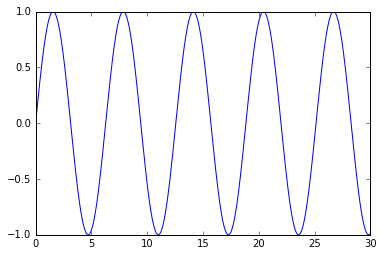

In [9]:
plt.plot(x,y)
plt.show()

In [12]:
yran = [i+(2*np.random.rand()-1) for i in y]

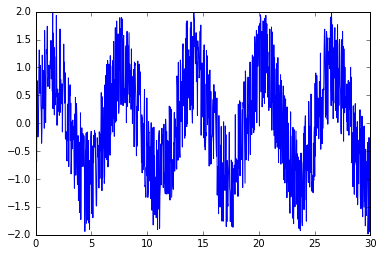

In [13]:
plt.plot(x,yran)
plt.show()

In [14]:
yran1 = [yran[i]+np.random.rand()*i for i in range(len(yran))]

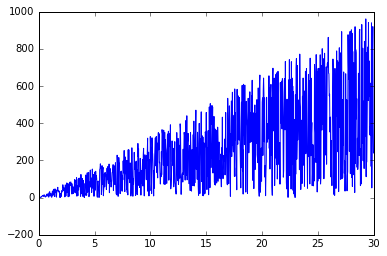

In [15]:
plt.plot(x,yran1)
plt.show()

In [23]:
def my_function(my_ls=[]):
    my_ls.append(1)
    for i in my_ls:
        print(i)
    return my_ls
print("first")
ls1 = my_function()
print(len(ls1))
print("second")
ls2 = my_function()
print(len(ls2))

first
1
1
second
1
1
2


2
2
